## MyTISSE. First prototype testing

On June 8th, 2023 a first testing of the prototype of the "MyTISSE" experience was performed. It involved 24 participants, taken from an audience of Master students, PhD candidates and young researcher in the domain of Digital Humanities. See the experimental protocol for the description of the set-up of the testing session.

In [2]:
# Import main dependencies
import matplotlib.pyplot as plt
import pandas as pd
import collections

mytisse_data = pd.read_csv("data/data_cleaned.csv", sep=";")

### Perception of meaningfulness

#### Question 1

> Summarize the experience you have just participated in  focusing on the aspects you considered more relevant according to your personal experience

Visitors were asked to summarize the experience, stressing more relevant elements. The following script allow to compute most frequent words applying stopwords removal and lemmatization. As for now, it provides only words occurring more than six times, yet the threshold can be changed as parameter of the function `return_topwords`. 

This demonstrates that the most important words are (_shape_ and _figure_ are computed together as in this context they are synonym):

| Word           | Frequency      |
|----------------|----------------|
| painting       | 21             |
| figure / shape | 19             |
| color          | 15             |
| interesting    | 9              |

In [3]:
# Import NLTK library to process textual data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to convert dict in top-words (set threshold)
def return_topwords(freq_dict, threshold):
    word_counter = collections.Counter(freq_dict)
    for word, count in word_counter.most_common():
        if count >= threshold:
            print(word, ": ", count)

def topwords_calculator(df_col): #
    text = " ".join(cat for cat in df_col).replace('\n', '') 

    wordcount = {} # Instantiate a dictionary

    # Frequency calculator

    for word in text.lower().split():
        #Preprocessing
        for char in [".", ",", ":", "\"", "!","\'s"]:                      #punctuation removal
            word = word.replace(char,"")         
        if word not in stopwords and word not in ["could", "without"]:     #stopwords removal
            word = lemmatizer.lemmatize(word)                              #lemmatization
            word = word.replace("colour","color")                          #AE / BE rectification
            # Start counter
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1
    return wordcount

# Prepare NLTK tools for textual pre-processing (valid for the entire dataset)
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

return_topwords(topwords_calculator(mytisse_data.q1), 6)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manuele/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


painting :  21
color :  15
figure :  13
interesting :  9
work :  8
different :  7
shape :  6


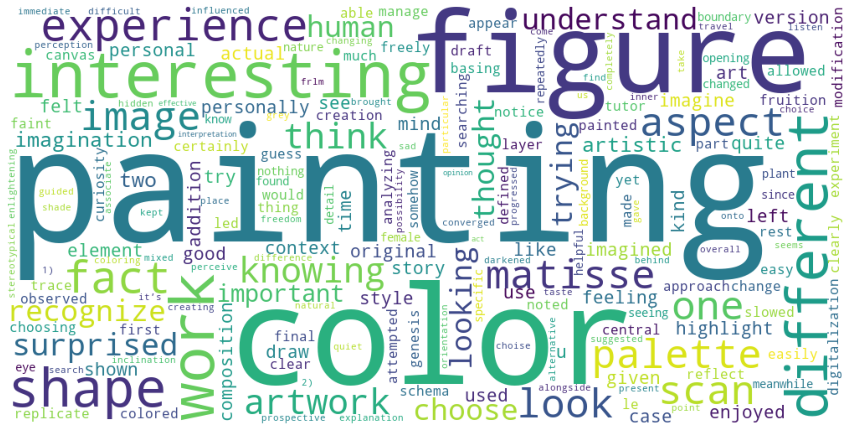

In [4]:
# Visualization through WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def wordcloud_generator(wc_dict):
    wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate_from_frequencies(wc_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")

wordcloud_generator(topwords_calculator(mytisse_data.q1))

#### Question 2

> Here there are some aspects about Bathers by a river that have been covered by MyTISSE. Please order them from the one you perceived as most important (1) to the less relevant one (5)

The suggested elements are: 
- The fact that it was conceived together with other two famous paintings
- The impact of the war
- The change of color
- The possibility to reconstruct the versions painting through conservation data
- The contact with other artistic avant-guardes (e.g. Cubism)

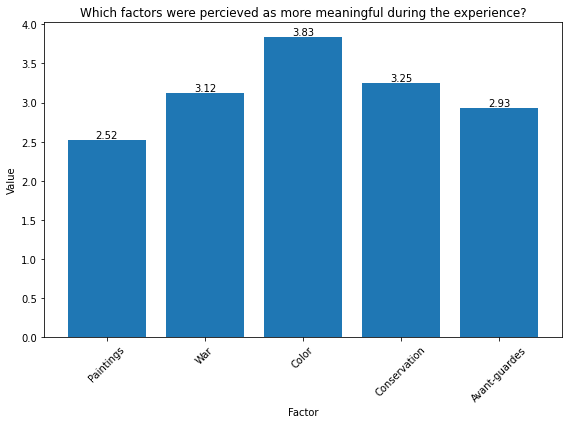

In [5]:
# Calculate the mean value for each column (one column, one factor)
paintings = mytisse_data['q2_music_dance'].astype(float).mean()
war = mytisse_data['q2_war'].astype(float).mean()
color_change = mytisse_data['q2_color'].astype(float).mean()
conservation_data = mytisse_data['q2_conservation'].astype(float).mean()
influence_cubism = mytisse_data['q2_cubism'].astype(float).mean()

# Plot
meaning_factors = {"Paintings": paintings, "War": war, "Color": color_change, "Conservation": conservation_data, "Avant-guardes": influence_cubism}

keys = list(meaning_factors.keys())
values = list(meaning_factors.values())
positions = range(len(keys))

plt.figure(figsize=(8, 6))
bars = plt.bar(positions, values, tick_label=keys)

plt.xlabel('Factor')
plt.ylabel('Value')
plt.title('Which factors were percieved as more meaningful during the experience?')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
            '{:.2f}'.format(height), ha='center', va='bottom')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In order of meaningfulness, the factors are:
1) The change of color (3.83)
2) The possibility to reconstruct the versions painting through conservation data (3.25)
3) The impact of the war (3.12)
4) The contact with other artistic avant-guardes (e.g. Cubism) (2.93)
5) The fact that it was conceived together with other two famous paintings (2.52)

### The choice of the palette

In the initial drawing task, participants were asked to draw on a XRF scans, choosing only one color palette

Palette A    16
Palette B     8
Name: q3, dtype: int64


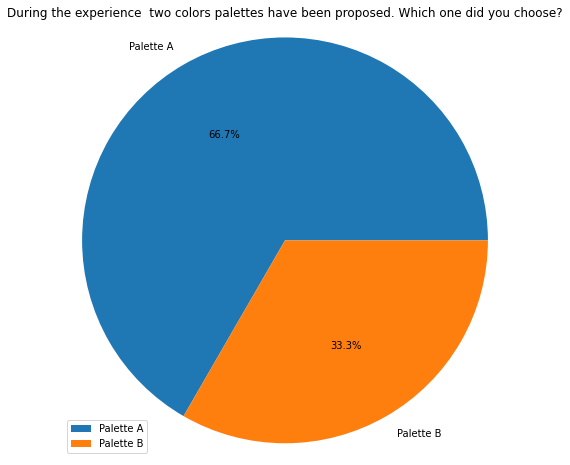

In [6]:
palette_value_counts = mytisse_data['q3'].value_counts()
print(palette_value_counts)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
palette_value_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('')
plt.title('During the experience  two colors palettes have been proposed. Which one did you choose?')
plt.legend()
plt.show()

#### Justification

Besides stating their palette preference, participants were also asked to justify their choice. As other traditional free text answers, these data are valued according to keywords frequency.

color :  13
palette :  6
figure :  5
vibrant :  4
one :  4
human :  3
title :  3
seemed :  3
tone :  3
painting :  3


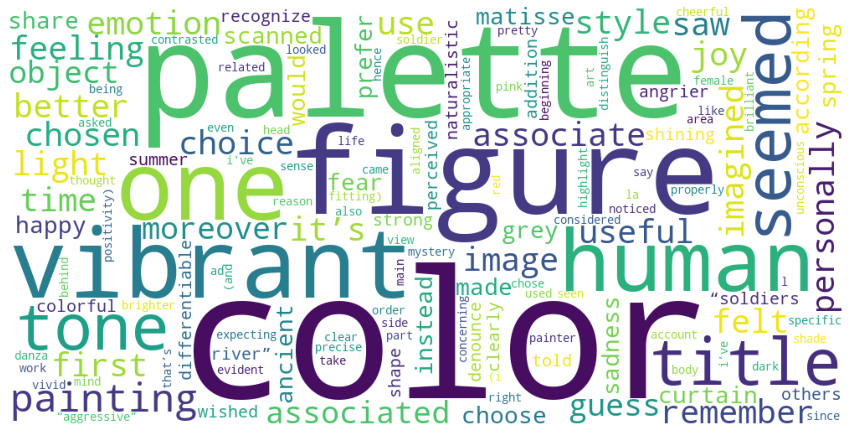

In [7]:
# For Palette A
palette_a = mytisse_data[mytisse_data['q3'] == 'Palette A']['q3_justification']

return_topwords(topwords_calculator(palette_a), 3)
wordcloud_generator(topwords_calculator(palette_a))

color :  7
painting :  4
chose :  3
palette :  3


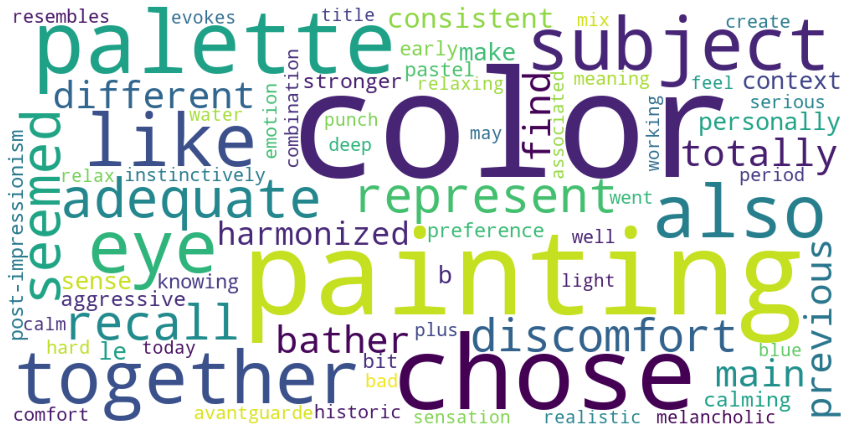

In [8]:
# For Palette B
palette_b = mytisse_data[mytisse_data['q3'] == 'Palette B']['q3_justification']

return_topwords(topwords_calculator(palette_b), 3)
wordcloud_generator(topwords_calculator(palette_b))

The data show no particular justification for the choice of the palette, but for the **association of palette A to more vibrant colors**. From the second wordcloud we also see that the second palette is associate to terms like <i>discomfort</i> or <i>melancholic</i> but their occurrence is not systematical (only one occurrence each).